# TME2

In [13]:
import gym
import gridworld
import copy
import numpy as np
from randomAgent import RandomAgent
from collections import defaultdict

In [4]:
actionToMove = {0:'bottom', 1:'top', 2:'left', 3:'right'}
moveToAction = {'bottom':0, 'top':1, 'left':2, 'right':3}

In [63]:
class valueIterationAgent(object):
    """Value iteration agent!"""

    def __init__(self, action_space):
        global env
        
        mdp = env.getMDP() 
        
        V = {}
        Vtmp = {}

        for etat in mdp[0]:
            V[etat] = {}
            V[etat]['score'] = 0.0
            V[etat]['action'] = None
            Vtmp[etat] = {}
            Vtmp[etat]['score'] = 0.0
            Vtmp[etat]['action'] = None

        gamma = 0.99
        seuil = 0.00001
        oldValues = np.full(len(V), 100)

        while(np.linalg.norm(oldValues-[d['score'] for d in V.values()]) > seuil):
            oldValues = np.array([d['score'] for d in V.values()])
            for etat, dic in mdp[1].items():

                maxScore = -np.inf
                bestAction = None

                #Calcul du score pour chaque action possible
                for action, val in mdp[1][etat].items():
                    score = 0

                    #Calcul du score de l'action courante
                    for possibility in val:

                        proba = possibility[0]
                        reward = possibility[2]
                        nextState = possibility[1]
                        score += proba*(reward+gamma*V[nextState]['score'])

                    if(score>maxScore):
                        maxScore = score
                        bestAction = action

                Vtmp[etat]['score'] = maxScore
                Vtmp[etat]['action'] = bestAction

            V = copy.deepcopy(Vtmp) #On enregistre l'ensemble des changement d'un coup
            
        self.policy = {state:dic['action'] for state, dic in V.items()}
    

    def act(self, observation, reward, done):
        currentState = gridworld.GridworldEnv.state2str(observation)
        print(currentState)
        return self.policy[currentState]

In [123]:
class QlearningAgent(object):
    """The world's simplest agent!"""

    def __init__(self, action_space):
        self.action_space = action_space
        self.Qsa = defaultdict(lambda: np.zeros(4))
        self.old_state = None
        self.old_act = None
        self.alpha = 0.01
        self.gamma = 0.9

    def act(self, observation, reward, done):
        
        currentState = gridworld.GridworldEnv.state2str(observation)
        # 1) Choix de l'action (greedy, espilon greedy, UCB ...)
        
        # Initialisation
        if self.old_state == None:
            
            action = env.action_space.sample()
            self.old_state = currentState
            self.old_act = action
            
            return action
        
        # greedy
        action = np.argmax(self.Qsa[currentState])
        
        # 2) Apprentissage
        max_Qsa = np.max(self.Qsa[currentState])
        self.Qsa[self.old_state][self.old_act] += self.alpha*(reward + self.gamma*(max_Qsa - self.Qsa[self.old_state][self.old_act]))
        
        # Update state and action
        
        self.old_state = currentState
        self.old_act = action
        
        return action

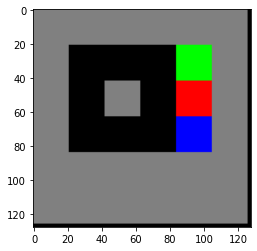

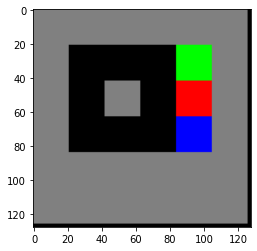

[ 1.47157964e+02 -1.91000000e-01 -9.13089271e-02 -9.20021933e-02]
2
Action choisi : left


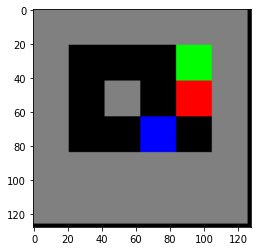

[-6.82570175e-04  1.47257899e+02 -6.25038063e-04 -8.83067863e-04]
1
Action choisi : top


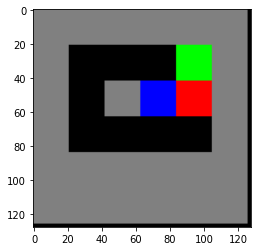

[-1.00638275e-01 -9.22357156e-02  1.47289088e+02 -1.00145263e-01]
0
Action choisi : bottom


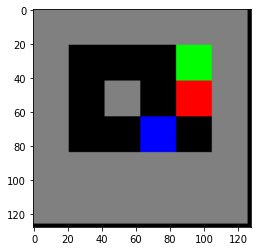

[-6.82570175e-04  1.47257899e+02 -6.25038063e-04 -8.83067863e-04]
2
Action choisi : left


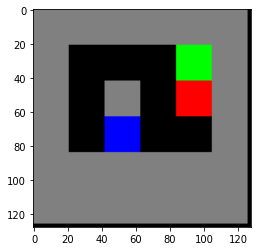

[-3.82810000e-04 -3.67798478e-04 -3.90342361e-04  1.47082400e+02]
2
Action choisi : left


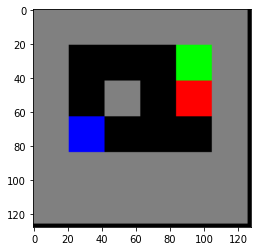

[-0.000382   -0.000382   -0.00038281 -0.00043325]
1
Action choisi : top


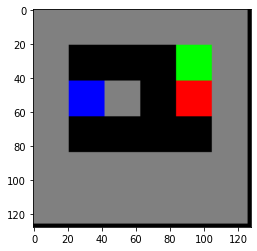

[-0.00030995 -0.00028281 -0.00038281 -0.00029919]
1
Action choisi : top


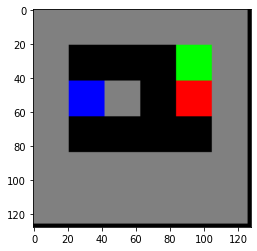

[-0.00030995 -0.00028281 -0.00038281 -0.00029919]
1
Action choisi : top


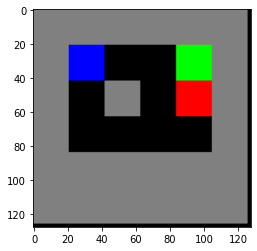

[-0.0002   -0.000191 -0.000191 -0.000282]
3
Action choisi : right


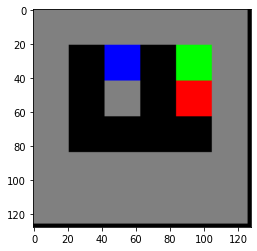

[-1.91000000e-04 -1.91000000e-04 -1.09000000e-04  1.47124002e+02]
3
Action choisi : right


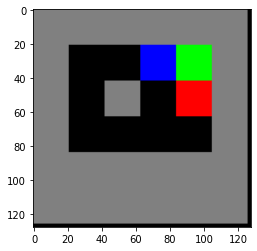

[147.35940771   0.           0.           0.        ]
3
Action choisi : right


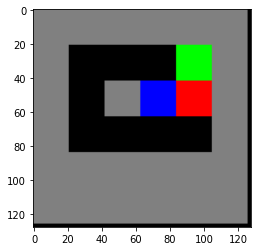

[-1.00638275e-01 -9.22357156e-02  1.47289088e+02 -1.00145263e-01]
1
Action choisi : top


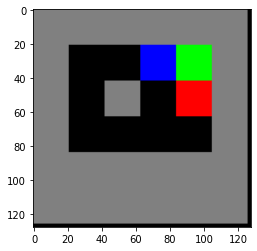

[147.35940771   0.           0.           0.        ]
3
Action choisi : right


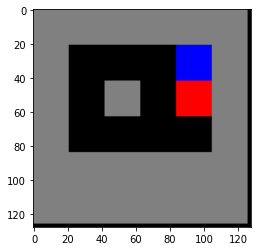

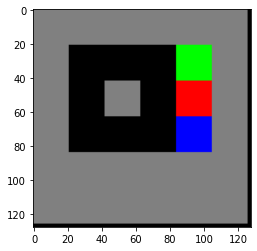

[ 1.47157964e+02 -1.91000000e-01 -9.13089271e-02 -9.20021933e-02]


KeyboardInterrupt: Interrupted by user

In [122]:
env = gym.make("gridworld-v0")
env.setPlan("gridworldPlans/plan0.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

env.seed(0)  # Initialise le seed du pseudo-random
#print(env.action_space)  # Quelles sont les actions possibles
#print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
useless = env.render()  # permet de visualiser la grille du jeu 
statedic, mdp = env.getMDP()  # recupere le mdp : statedic
#print("Nombre d'etats : ",len(statedic))  # nombre d'etats ,statedic : etat-> numero de l'etat
state, transitions = list(mdp.items())[0]
#print(state)  # un etat du mdp
#print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}

# Execution avec un Agent
agent = HumanAgent(env.action_space)


episode_count = 1000
reward = 0
done = False
rsum = 0
FPS = 0.0001
for i in range(episode_count):
    obs = env.reset()
    env.verbose = False  # afficher 1 episode sur 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(obs, reward, done)
        print("Action choisi :", actionToMove[action])
        obs, reward, done, _ = env.step(action)
        rsum += reward
        j += 1
        if env.verbose:
            useless = env.render(FPS)
        if done:
            #print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            break
print("done")
env.close()

In [120]:
list(agent.Qsa.values())
import copy
Q = copy.deepcopy(agent.Qsa)

In [121]:
class HumanAgent(object):
    """Human agent!"""
    
    def __init__(self, action_space):
        pass


    def act(self, obs, reward, done):
        global Q
        print(Q[gridworld.GridworldEnv.state2str(obs)])
        return int(input())